### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

### Read CSVs

In [4]:
account_data = pd.read_csv('data/account.csv', na_values=['NA'], sep=';', low_memory=False)
client_data = pd.read_csv('data/client.csv', na_values=['NA'], sep=';', low_memory=False)
disp_data = pd.read_csv('data/disp.csv', na_values=['NA'], sep=';', low_memory=False)
district_data = pd.read_csv('data/district.csv', na_values=['NA'], sep=';', low_memory=False)

#train
card_train_data = pd.read_csv('data/card_train.csv', na_values=['NA'], sep=';', low_memory=False)
loan_train_data = pd.read_csv('data/loan_train.csv', na_values=['NA'], sep=';', low_memory=False)
trans_train_data = pd.read_csv('data/trans_train.csv', na_values=['NA'], sep=';', low_memory=False)

#test
card_test_data = pd.read_csv('data/card_test.csv', na_values=['NA'], sep=';', low_memory=False)
loan_test_data = pd.read_csv('data/loan_test.csv', na_values=['NA'], sep=';', low_memory=False)
trans_test_data = pd.read_csv('data/trans_test.csv', na_values=['NA'], sep=';', low_memory=False)


print(' ::: Tables Scheme :::')
print('\n\n\t ACCOUNT TABLE')
display(account_data.head())
print('\n\n\t CLIENT TABLE')
display(client_data.head())
print('\n\n\t DISPOSITION TABLE')
display(disp_data.head())
print('\n\n\t DISTRICT TABLE')
display(district_data.head())
print('\n\n\t CARD TABLE')
display(card_train_data.head())
print('\n\n\t LOAN TABLE')
display(loan_train_data.head())
print('\n\n\t TRANSACTIONS TABLE')
display(trans_train_data.head())


 ::: Tables Scheme :::


	 ACCOUNT TABLE


,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102




	 CLIENT TABLE


,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5




	 DISPOSITION TABLE


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT




	 DISTRICT TABLE


,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040




	 CARD TABLE


,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215




	 LOAN TABLE


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1




	 TRANSACTIONS TABLE


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


### Statistics

#### Successful loans

In [5]:
sucessful = loan_train_data.groupby(['status']).count()
sucessful

,loan_id,account_id,date,amount,duration,payments
status,,,,,,
-1,46,46,46,46,46,46
1,282,282,282,282,282,282


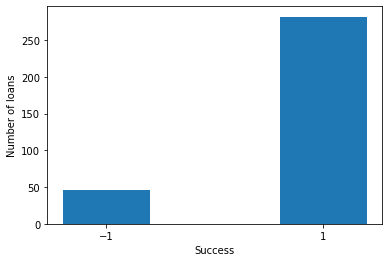

In [99]:
values = [value for value, df in loan_train_data.groupby(['status'])]

plt.bar(values, sucessful['duration'])
plt.xticks(values)
plt.ylabel('Number of loans')
plt.xlabel('Success')
plt.show()

#### Number of commited crimes


In [50]:
district_data.head(50)

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
5,6,Kutna Hora,central Bohemia,77963,60,23,4,2,4,51.5,8546,2.95,4.02,126,2640,3120
6,7,Melnik,central Bohemia,94725,38,28,1,3,6,63.4,9920,2.26,2.87,130,4289,4846
7,8,Mlada Boleslav,central Bohemia,112065,95,19,7,1,8,69.4,11277,1.25,1.44,127,5179,4987
8,9,Nymburk,central Bohemia,81344,61,23,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
9,10,Praha - vychod,central Bohemia,92084,55,29,4,3,5,46.7,10124,0.56,0.54,141,3810,4316


In [80]:
districts = district_data['name ']
crimes95 = district_data["no. of commited crimes '95 "]
crimes95["no. of commited crimes '95 "] = pd.to_numeric(district_data["no. of commited crimes '95 "], downcast="float", errors='coerce')
crimes95 = crimes95.interpolate()
crimes95 = crimes95["no. of commited crimes '95 "]
crimes96 = district_data["no. of commited crimes '96 "]
print(crimes95.head(50))
print(crimes96.head(50))

0     85677.0
1      2159.0
2      2824.0
3      5244.0
4      2616.0
5      2640.0
6      4289.0
7      5179.0
8      2987.0
9      3810.0
10     3475.0
11     3804.0
12     1597.0
13     6604.0
14     1845.0
15     1874.0
16     1003.0
17     1740.0
18      999.0
19     1563.0
20     2299.0
21     1089.0
22     2879.0
23     5198.0
24     1822.0
25     6041.0
26     1029.0
27     1580.0
28      818.0
29     2985.0
30     1328.0
31     4340.0
32     4650.0
33     5323.0
34     3384.0
35     5796.0
36     4147.0
37     2653.0
38     4947.0
39     6949.0
40     6445.0
41     1658.0
42     4085.0
43     2166.0
44     2080.0
45     2854.0
46     6079.0
47     1655.0
48     1660.0
49     2123.0
Name: no. of commited crimes '95 , dtype: float32
0     99107
1      2674
2      2813
3      5892
4      3040
5      3120
6      4846
7      4987
8      2487
9      4316
10     3529
11     3868
12     1875
13     6295
14     1879
15     1913
16     1181
17     1910
18     1099
19     1542
20     235

<ipython-input-80-c58778e604c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes95["no. of commited crimes '95 "] = pd.to_numeric(district_data["no. of commited crimes '95 "], downcast="float", errors='coerce')


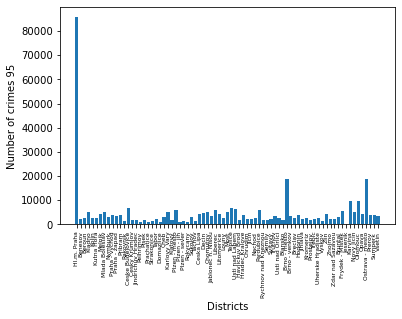

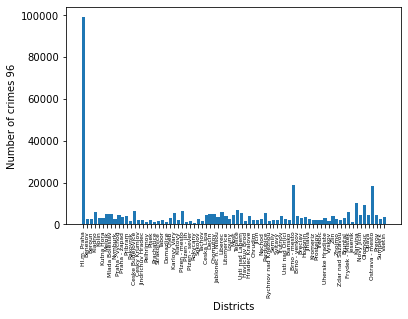

In [81]:
plt.bar(districts, crimes95)
plt.xticks(districts, rotation='vertical', size=6)
plt.ylabel('Number of crimes 95')
plt.xlabel('Districts')
plt.show()

plt.bar(districts, crimes96)
plt.xticks(districts, rotation='vertical', size=6)
plt.ylabel('Number of crimes 96')
plt.xlabel('Districts')
plt.show()

#### Average Salary by Region


Text(0, 0.5, 'Average Salary')

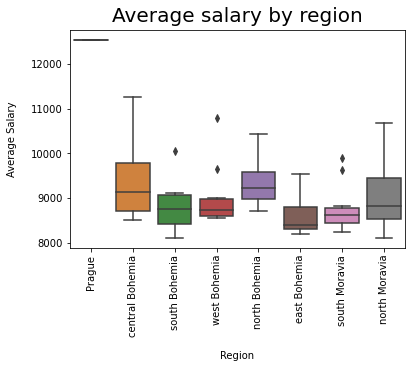

In [91]:
ax3 = sb.boxplot(x="region", y="average salary ", data=district_data, saturation=0.6)
ax3.axes.set_title("Average salary by region", fontsize=20, y=1.01)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
plt.xlabel("Region", labelpad=14)
plt.ylabel("Average Salary", labelpad=14)

#### Loan Amount

In [83]:
amounts = loan_train_data['amount'].unique()

In [84]:
no_amounts = loan_train_data.groupby(['amount']).count()
no_amounts

,loan_id,account_id,date,duration,payments,status
amount,,,,,,
4980,1,1,1,1,1,1
7656,1,1,1,1,1,1
11400,1,1,1,1,1,1
11736,1,1,1,1,1,1
14628,1,1,1,1,1,1
...,...,...,...,...,...,...
444864,1,1,1,1,1,1
464520,1,1,1,1,1,1
465072,1,1,1,1,1,1


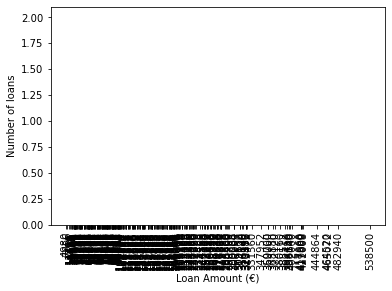

In [86]:
plt.bar(amounts, no_amounts['duration'])
plt.xticks(amounts, rotation='vertical')
plt.ylabel('Number of loans')
plt.xlabel('Loan Amount (€)')
plt.show()

#### Type of credit card

In [92]:
card_type = card_train_data.groupby(['type']).count()
card_type

,card_id,disp_id,issued
type,,,
classic,127,127,127
gold,9,9,9
junior,41,41,41


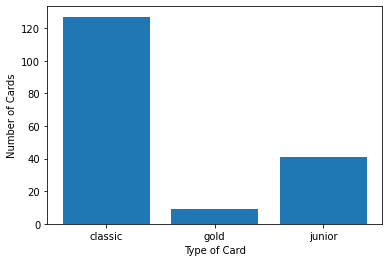

In [97]:
values = [value for value, df in card_train_data.groupby(['type'])]

plt.bar(values, card_type['card_id'])
plt.xticks(values)
plt.ylabel('Number of Cards')
plt.xlabel('Type of Card')
plt.show()

#### District data correlation matrix

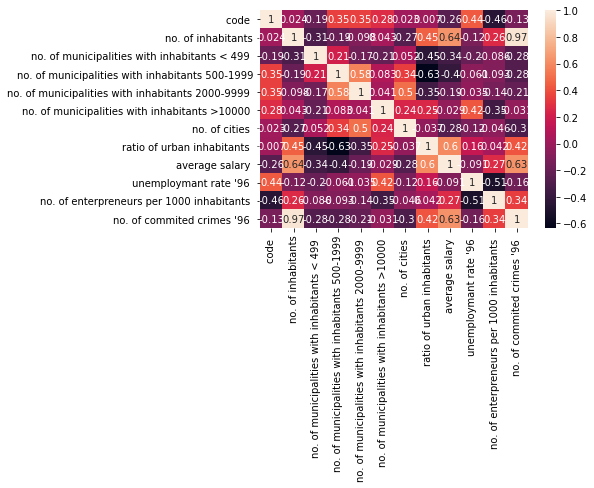

In [6]:
corrMatrix = district_data.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

#### Loan data correlation matrix

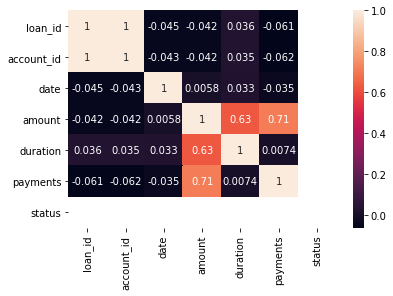

In [6]:
corrMatrix = loan_test_data.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()